In [4]:
# Ingest data

In [21]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def pm25_template_table(date):
    row_list = []
    columns = ['เขต', 'สถานีตรวจวัด', 'วันที่และเวลา', 'PM10', 'PM2.5', 'CO', 'NO2',
                'O3', 'Wind Speed', 'Wind Direction', 'Temperature',
                'Relative Humidity', 'Air Pressure']
    for i in range(24):
        datetime_str = f"{date} {str(i).zfill(2)}:00"
        row = [None,None,datetime_str] + [None for i in range(len(columns)-3)]
        row_list.append(row)
    return pd.DataFrame(row_list, columns=columns)


In [7]:
# Get all CSV files recursively
csv_files = glob.glob(f"../data/เขตคลองเตย/**/*.csv", recursive=True)

# Ensure there are CSV files before proceeding
if not csv_files:
    print("No CSV files found. Exiting.")
    exit()

# Concatenate all csv files in the specified folder
df_list = []
for file in csv_files:
    is_empty = False
    try:
        temp_df = pd.read_csv(file)
        is_empty = True if temp_df.empty else False
    except:
        is_empty = True

    if is_empty:
        date = file.split('/')[-1][:10]
        year,month,day = date.split('-')
        date_re = f'{int(day)}/{int(month)}/{year}'
        temp_df = pm25_template_table(date_re)

    df_list.append(temp_df)

df = pd.concat(df_list, axis=0) # Warning occurs since df contains all-NA columns

/tmp/ipykernel_666/3381533707.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(df_list, axis=0) # Warning occurs since df contains all-NA columns


In [17]:
df

,เขต,สถานีตรวจวัด,วันที่และเวลา,PM10,PM2.5,CO,NO2,O3,Wind Speed,Wind Direction,Temperature,Relative Humidity,Air Pressure,datetime
0,คลองเตย,เขตคลองเตย,1/3/2023 00:00,NaN,53.0,NaN,9.0,3.0,0.1,356.0,28.2,49.0,1016.0,2023-03-01 00:00:00
1,คลองเตย,เขตคลองเตย,1/3/2023 01:00,NaN,53.0,NaN,9.0,3.0,0.1,358.0,27.6,50.0,1016.0,2023-03-01 01:00:00
2,คลองเตย,เขตคลองเตย,1/3/2023 02:00,NaN,54.0,NaN,9.0,8.0,0.1,356.0,27.2,51.0,1015.0,2023-03-01 02:00:00
3,คลองเตย,เขตคลองเตย,1/3/2023 03:00,NaN,48.0,NaN,8.0,15.0,0.1,351.0,27.1,49.0,1014.0,2023-03-01 03:00:00
4,คลองเตย,เขตคลองเตย,1/3/2023 04:00,NaN,65.0,NaN,8.0,10.0,0.1,350.0,26.5,51.0,1014.0,2023-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,คลองเตย,เขตคลองเตย,31/12/2024 19:00,NaN,24.9,NaN,41.0,22.0,0.1,9.0,29.3,42.0,1011.0,2024-12-31 19:00:00
20,คลองเตย,เขตคลองเตย,31/12/2024 20:00,NaN,28.5,NaN,31.0,27.0,0.2,353.0,28.3,50.0,1012.0,2024-12-31 20:00:00
21,คลองเตย,เขตคลองเตย,31/12/2024 21:00,NaN,38.9,NaN,37.0,13.0,0.0,359.0,27.1,55.0,1013.0,2024-12-31 21:00:00
22,คลองเตย,เขตคลองเตย,31/12/2024 22:00,NaN,57.1,NaN,32.0,14.0,0.1,333.0,26.7,58.0,1013.0,2024-12-31 22:00:00


In [11]:
df['datetime'] = pd.to_datetime(df['วันที่และเวลา'], format="%d/%m/%Y %H:%M")

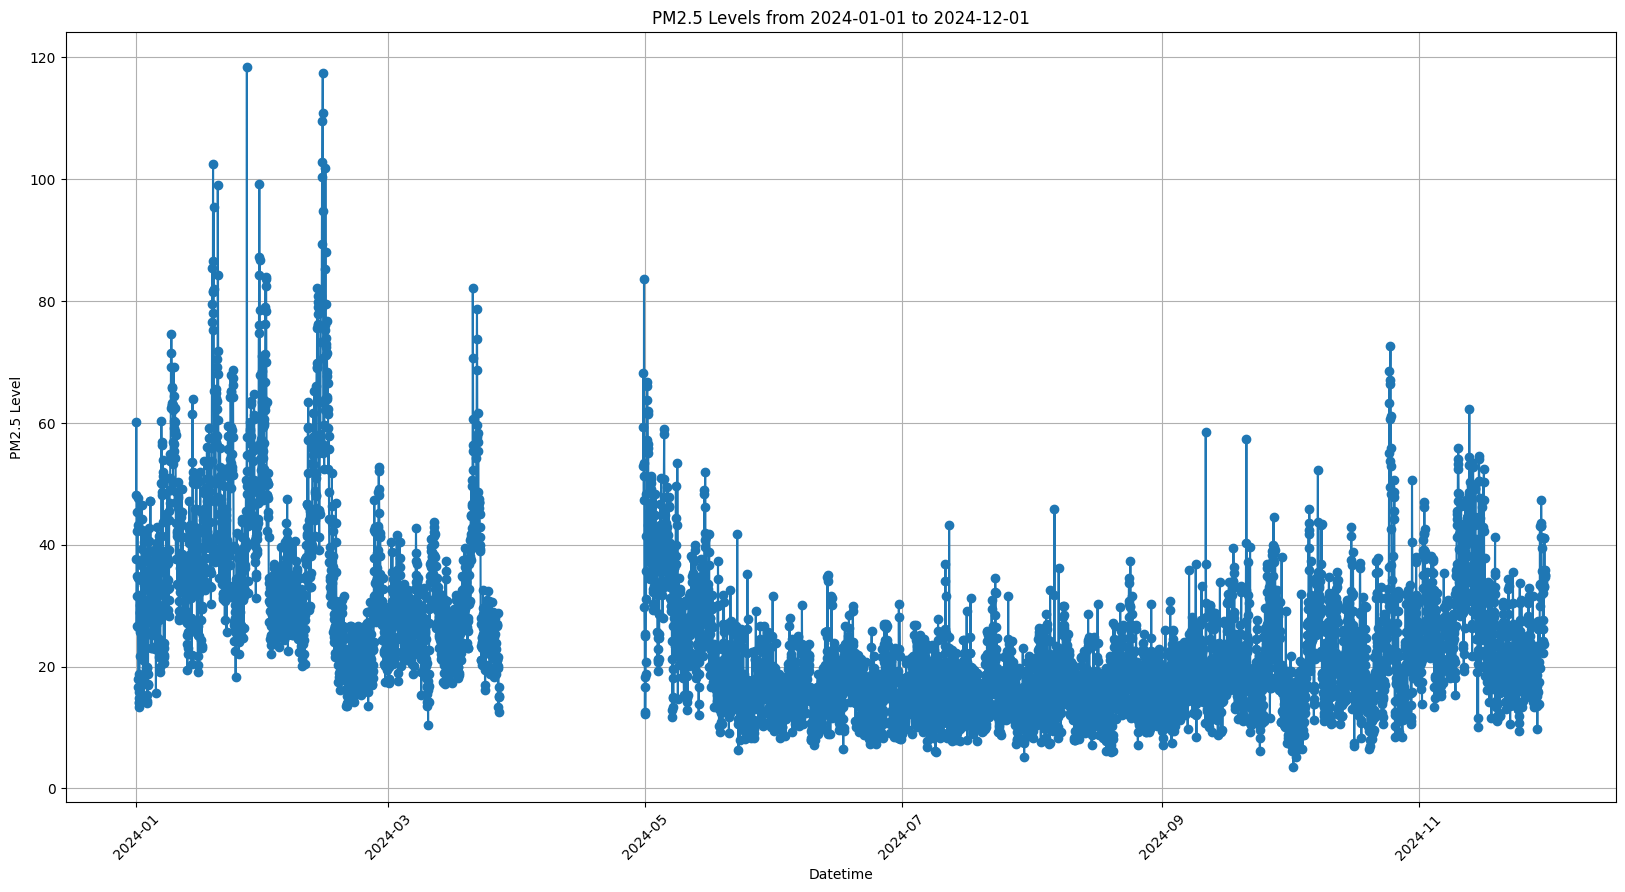

In [47]:
# Define the date range (modify as needed)
start_date = "2024-01-01"
end_date = "2024-12-01"

# Filter the DataFrame by date range
df_filtered = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

# Plot the filtered data
plt.figure(figsize=(20, 10))  # Adjust figure size
plt.plot(df_filtered['datetime'], df_filtered['PM2.5'], marker='o', linestyle='-')
plt.xlabel("Datetime")
plt.ylabel("PM2.5 Level")
plt.title(f"PM2.5 Levels from {start_date} to {end_date}")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid for better visualization
plt.show()

In [52]:
df.to_csv(r'../temp/temp.csv', index=False, encoding='utf-8')